
# Session 2 – **Exploratory Data Analysis (EDA)**

This notebook guides you through a practical, end‑to‑end EDA workflow.  
It is a warm up, after you finished it successfully, repeat the process for your own data and work through the steps.

**What you'll do**
1. Load and inspect your dataset
2. Summarize numeric & categorical variables
3. Explore missingness and duplicates
4. Visualize distributions, relationships, and correlations
5. Capture insights in short Markdown notes
6. Draft 2–3 KPI ideas informed by your EDA

**Note:** This notebook intentionally focuses on *EDA only*.  
> Cleaning/feature engineering strategies (e.g., imputation/outlier handling) will be done in the next session.


You might need to download files from:
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/GTNEJD&version=1.2


## 0) Setup
- Update `DATA_PATH` to your chosen dataset (CSV).  
- If the file is not found, a small **synthetic demo dataset** will be generated so you can still run the notebook end‑to‑end.


In [ ]:
# pip install -r ../requirements.txt

In [1]:

import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Display options
pd.set_option("display.max_columns", 300)
pd.set_option("display.width", 120)

# ---- Path to your CSV ----
# If you have the Harvard PeopleSuN dataset in your data folder from last session, copy it
# in the data folder of this week and set the path like:
DATA_PATH = "../data/peoplesun_hh_anon.csv"  

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)



## 1) Load Data
- Try to read the CSV at `DATA_PATH`.
- If not found, we build a small **synthetic dataset** to let you proceed.


In [2]:

# def make_synthetic_demo(n=1000):
#     # Toy dataset with mixed types: numeric, categorical, date, and some missingness
#     dates = pd.date_range("2021-01-01", periods=n, freq="D")
#     region = np.random.choice(["North","South","East","West"], size=n, p=[0.25,0.25,0.25,0.25])
#     income = np.random.lognormal(mean=10, sigma=0.5, size=n)  # heavily skewed
#     pop_density = np.random.gamma(shape=2.0, scale=50, size=n)
#     electrified = np.random.binomial(n=1, p=np.clip(0.3 + 0.001*(pop_density) + 0.00001*(income), 0.05, 0.95))
#     # insert some missingness
#     income[np.random.choice(n, size=n//15, replace=False)] = np.nan
#     pop_density[np.random.choice(n, size=n//20, replace=False)] = np.nan
#     # a few duplicates
#     df = pd.DataFrame({
#         "date": dates,
#         "region": region,
#         "income": income,
#         "population_density": pop_density,
#         "electrified": electrified
#     })
#     df = pd.concat([df, df.sample(5, random_state=RANDOM_SEED)], ignore_index=True)
#     return df

if os.path.exists(DATA_PATH):
    df = pd.read_csv(DATA_PATH,low_memory=False)
    source_note = f"Loaded dataset from: {DATA_PATH}"
# else:
#     df = make_synthetic_demo(n=1200)
#     source_note = "Using synthetic demo dataset (file not found)."

source_note, df.head()


('Loaded dataset from: ../data/peoplesun_hh_anon.csv',
             zone  state    eaid          lga                  urca_cat                                  hhid  q102  \
 0  North Central  Niger  NI_197      mashegu  <1hr to small city/town+  d8af8ab5-30ab-4d9f-bfe4-81231dbe5dbf     1   
 1  North Central  Niger  NI_197      mashegu  <1hr to small city/town+  e8245d5c-8130-4e78-b4b0-1053b7ecbc9b     1   
 2     North West   Kano  KN_104  garun_malam        <1hr to large city  435c8e27-517a-46b9-af04-48830e086d7a     1   
 3     North West   Kano  KN_104  garun_malam        <1hr to large city  9303fa53-9fd2-41a9-9f0d-9567dbe5168e     1   
 4     North West   Kano  KN_104  garun_malam        <1hr to large city  c62cc5a5-29c5-423b-9543-a7b05bda454b     1   
 
    q103  q104  q105  q106  q107  q108  q109  q110  q201  q202  q203_1  q203_2  q203_3  q203_4  q204  q205  q206  \
 0   NaN     1     1    36     2   NaN   NaN   NaN     5     4      13       4       1       0     2     8     6 


## 2) First Look
**Questions**
- What do rows represent? What does each column mean?
- Do we recognize numeric vs categorical vs datetime columns?


In [26]:
df.head()

,zone,state,eaid,lga,urca_cat,hhid,q102,q103,q104,q105,q106,q107,q108,q109,q110,q201,q202,q203_1,q203_2,q203_3,q203_4,q204,q205,q206,q207_1,q207_2,q207_3,q208,q209,q210,q210_1,q211,q211__1,q211__2,q211__3,q211__4,q211__5,q211__6,q211__7,q211__8,q211__9,q211__10,q211__11,q211__12,q211__0,q211__96,q211_1,q212,q212_1,q213,q213_1,q213_1__1,q213_1__2,q213_1__96,q214,q214__1,q214__2,q214__3,q214__4,q214__5,q214__6,q214__7,q214__8,q214__9,q214__10,q214__11,q214__12,q214__13,q214__96,q215,q215_1,q215_2,q216,q216__1,q216__2,q216__3,q216__4,q216__5,q216__6,q216__7,q216__8,q216__9,q216__10,q216__11,q216__12,q216__13,q217,q217__1,q217__2,q217__3,q217__4,q217__5,q217__6,q217__7,q217__8,q217__9,q217__10,q217__11,q217__12,q217__13,q218,q219,q219__1,q219__2,q219__3,q219__4,q219__5,q219__6,q219__99,q219__96,q219__98,q219_1,q220,q220_1,q221,q221_1,q222,q223,q224,q224_1,q224_2,q301,q301__1,q301__2,q301__3,q301__4,q301__5,q301__6,q301__7,q301__8,q301__9,q301__10,q301__11,q301__12,q301__13,q301__14,q301__0,q301__96,q302,q303,q304_1,q304_2,q304_3,q304_4,q304_5,q304_6,q304_7,q304_8,q304_9,q304_10,q304_10__1,q304_10__2,q304_10__3,q304_10__4,q304_10__5,q304_10__6,q304_10__7,q304_10__0,q304_10__96,q305_1,q305_2,q305_3,q305_4,q305_5,q305_6,q305_7,q306_1,q306_2,q306_2__1,q306_2__2,q306_2__3,q306_2__4,q306_2__5,q306_2__6,q306_2__7,q306_2__8,q306_2__9,q306_2__10,q306_2__11,q306_2__12,q306_2__13,q306_3,q306_4,q306_5,q306_6,q306_7,q306_8,q306_9,q306_10,q306_11,q306_12,q307_1,q307_2,q307_2__1,q307_2__2,q307_2__3,q307_2__4,q307_2__5,q307_2__6,q307_2__7,q307_2__8,q307_2__9,q307_2__10,q307_2__11,q307_2__12,q307_2__13,q307_3,q307_4,q307_5,q307_6,q307_7,q307_8,q307_9,q307_10,q307_11,q307_12,q308,q309,q401,q401__1,q401__2,q401__3,q401__4,q401__5,q401__6,q401__99,q401__96,q401__98,q401_1,q402,q402__1,q402__2,q402__3,q402__4,q402__5,q402__6,q404,q404__1,q404__2,q404__3,q404__4,q404__5,q404__6,q404__7,q404__8,q404__9,q404__10,q404__11,q404__0,q404__96,q404_1,q405,q405_1,q405_1__1,q405_1__2,q405_1__3,q405_1__4,q405_1__5,q405_1__6,q405_1__7,q405_1__8,q405_1__9,q405_1__10,q405_1__11,q405_1__12,q405_1__13,q405_1__96,q405_2,q501,q501__1,q501__2,q501__3,q501__4,q501__5,q501__96,q503,q503__1,q503__2,q503__3,q503__4,q503__5,q503__6,q503__99,q503__96,q503__98,q503_1,q604_1,q604_2,q604_3,q604_4,q604_5,q604_6,natweight
0,North Central,Niger,NI_197,mashegu,<1hr to small city/town+,d8af8ab5-30ab-4d9f-bfe4-81231dbe5dbf,1,NaN,1,1,36,2,NaN,NaN,NaN,5,4,13,4,1,0,2,8,6,0,2,0,22,14,96,Politics,2 96,0,1,0,0,0,0,0,0,0,0,0,0,0,1,Politics and farming for consumption,1,1.0,1,1,1.0,0.0,0.0,1 11,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,6 7,0,0,0,0,0,1,1,0,0,0,0,0,0,12 1 2,1,1,0,0,0,0,0,0,0,0,0,1,0,7000,1,1,0,0,0,0,0,NaN,0,0,NaN,96,Kambari,96,Kambari,4,5,1,1.0,NaN,1 7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6 7 8,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,20.0,0.0,0.0,3000.0,15000.0,3000.0,2.0,2.0,1,2000.0,1,1,0,0,0,0,0,NaN,0,0,NaN,1 3 4 6,1,0,1,1,0,1,2 11,0,1,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1,1,0,0,0,0,0,NaN,0,0,NaN,4,2,3,2,3,3,0.039141
1,North Central,Niger,NI_197,mashegu,<1hr to small city/town+,e8245d5c-8130-4e78-b4b0-1053b7ecbc9b,1,NaN,1,1,60,2,NaN,NaN,NaN,6,2,4,3,2,1,3,9,6,0,0,0,14,13,1,NaN,1 3 96,1,0,1,0,0,0,0,0,0,0,0,0,0,1,Farming for consumption,0,NaN,1,1,1.0,0.0,0.0,11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,8,0,0,0,0,0,0,0,1,0,0,0,0,0,11 12,0,0,0,0,0,0,0,0,0,0,1,1,0,5000,1,1,0,0,0,0,0,NaN,0,0,NaN,96,Kambari,96,Kambari,4,5,1,0.0,NaN,1 5 7,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,7,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,1.0,2.0,60000.0,6000.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6 7 8,0.0,0.0,0.

In [25]:
print(source_note)
print("\nShape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nInfo:")
print(df.info())
#display(df.head(10))


Loaded dataset from: ../data/peoplesun_hh_anon.csv

Shape: (3599, 293)

Columns: ['zone', 'state', 'eaid', 'lga', 'urca_cat', 'hhid', 'q102', 'q103', 'q104', 'q105', 'q106', 'q107', 'q108', 'q109', 'q110', 'q201', 'q202', 'q203_1', 'q203_2', 'q203_3', 'q203_4', 'q204', 'q205', 'q206', 'q207_1', 'q207_2', 'q207_3', 'q208', 'q209', 'q210', 'q210_1', 'q211', 'q211__1', 'q211__2', 'q211__3', 'q211__4', 'q211__5', 'q211__6', 'q211__7', 'q211__8', 'q211__9', 'q211__10', 'q211__11', 'q211__12', 'q211__0', 'q211__96', 'q211_1', 'q212', 'q212_1', 'q213', 'q213_1', 'q213_1__1', 'q213_1__2', 'q213_1__96', 'q214', 'q214__1', 'q214__2', 'q214__3', 'q214__4', 'q214__5', 'q214__6', 'q214__7', 'q214__8', 'q214__9', 'q214__10', 'q214__11', 'q214__12', 'q214__13', 'q214__96', 'q215', 'q215_1', 'q215_2', 'q216', 'q216__1', 'q216__2', 'q216__3', 'q216__4', 'q216__5', 'q216__6', 'q216__7', 'q216__8', 'q216__9', 'q216__10', 'q216__11', 'q216__12', 'q216__13', 'q217', 'q217__1', 'q217__2', 'q217__3', 'q217__

To make your EDA more interpretable:

### a) Load and inspect the codebook

If you have something like peoplesun_codebook.csv or .xlsx:

In [7]:
# pip install openpyxl

In [8]:
codebook = pd.read_excel("../data/peoplesun_hh_odk_codebook.xlsx")
display(codebook.head())

,type_kobo,type,name,label
0,select_one state,select_one,states,State
1,select_one lga,select_one,lgas,Local Government Areas
2,select_one yesnolist,logical,q102,102. Would you like to participate in the survey?
3,select_one rejectlist,select_one,q103,103. Record the reason from the following and ...
4,select_one rellist,select_one,q104,104. What is your relationship to the househol...


### b) Build a quick lookup dictionary

In [9]:
mapping = dict(zip(codebook["name"], codebook["label"]))
df_renamed = df.rename(columns=mapping)

You have now replaced the code for questions with the full question.


In [10]:
df_renamed.head()

,zone,state,eaid,lga,urca_cat,hhid,102. Would you like to participate in the survey?,103. Record the reason from the following and abort the survey,104. What is your relationship to the household head?,105. What is your gender?,106. What is your age?,107. What is your marital status?,108. What is the gender of the household head?,109. What is the age of the household head?,110. What is the marital status of the household head?,201. How many adults live in this household permanently?,202. How many chairs do you have in your home?,203.1. How many household members are less than 18 years of age?,203.2. How many household members are between 18 to 30 years of age?,203.3. How many household members are between 31 to 55 years of age?,203.4. How many household members are over 55 years of age?,204. How many separate roofs make-up your home plot/compound?,205. How many separate rooms are in all buildings of your home plot/compound?,206. How would you describe the majority of the roofs? [PROMPT],207.1. How many [bicycle] do you own?,207.2. How many [Motorbike / scooter] do you own?,207.3. How many [Car / van / truck] do you own?,208. What is the highest level of education achieved by a male currently living in this household?,209. What is the highest level of education achieved by a female currently living in this household?,210. What is the MAIN income source of the household?,210.1 Other (specify),211. Can you list ALL of the income sources of your household? [MC],q211__1,q211__2,q211__3,q211__4,q211__5,q211__6,q211__7,q211__8,q211__9,q211__10,q211__11,q211__12,q211__0,q211__96,211.1 Other (specify),212. Does anyone in the household have a bank account at a formal institution?,212.1. At which institution is this account or savings? [PROMPT],213. Does anyone in the household use an informal savings groups (adashi/esusu/ajo) to save money?,213.1. What type of informal savings group do household members use? [MC] [PROMPT],q213_1__1,q213_1__2,q213_1__96,"214. If you can get a loan/credit, what are the sources of credit/loans? [MC]",q214__1,q214__2,q214__3,q214__4,q214__5,q214__6,q214__7,q214__8,q214__9,q214__10,q214__11,q214__12,q214__13,q214__96,"215. Do you have a mobile money account (e.g. Opay, Firstmonie, Paga, MoMo) [ENUMERATOR: if respondant does not know what this is, select ""no""]",215.1. Do you use mobile money to make payments over the mobile phone?,215.2. Have you used the account in the past 90 days?,216. In which months of the year does the household have the least money or is it the same over the whole year? [MC] [ENUMERATOR: make sure you check option “same over the whole year” if this is the case],q216__1,q216__2,q216__3,q216__4,q216__5,q216__6,q216__7,q216__8,q216__9,q216__10,q216__11,q216__12,q216__13,217. In which months of the year does the household have the most money? [MC] [ENUMERATOR: make sure you check option “same over the whole year” if this is the case],q217__1,q217__2,q217__3,q217__4,q217__5,q217__6,q217__7,q217__8,q217__9,q217__10,q217__11,q217__12,q217__13,"218. How much does your household spend in a typical week on household expenditures including both food and non-food items, such as cereals, grains, vegetables, meat, drinks, soap, pharmacy, mobile top-up? Do NOT include fuel and electricity. [ENUMERATOR: if given a range, ask typically which of the values is more common and use that].","219. Who decides / whose opinions are valued when deciding on which expensive items (like a mattress, bicycle or livestock) to buy in the household? [MC] [PROMPT] [ENUMERATOR: make sure it is clear this is multiple choice]",q219__1,q219__2,q219__3,q219__4,q219__5,q219__6,q219__99,q219__96,q219__98,219.1. Other (specify),"220. Which Nigerian language is your MAIN mother tongue or language of origin? [ENUMERATOR: Prompt if necessary: “That is, the language of your group of origin.”]",220.1. Other (specify),221. Which is the primary language you speak in your home now?,221.1. Other (specify),222. Do the lead women in the

Note that some columns are staying as codes, these are flattened options that were made out of answers to the last question.
Example: 211. Can you list ALL of the income sources of your household?
Then the following collumns represent options 1 to 14. The options can be found in choicebook.


## 3) Data Types & Basic Hygiene (EDA-only)
- Identify numeric, categorical, datetime columns.


In [12]:
# Identify column types
numeric_cols = df_renamed.select_dtypes(include=[np.number]).columns.tolist()
datetime_cols = df_renamed.select_dtypes(include=["datetime64[ns]", "datetime64[ns, UTC]"]).columns.tolist()
categorical_cols = [c for c in df_renamed.columns if c not in numeric_cols + datetime_cols]

print("Numeric:", numeric_cols)
# Print a line to separate long lists
print("-" * 40)
print("Datetime:", datetime_cols)
print("-" * 40)
print("Categorical/Other:", categorical_cols)


Numeric: ['102. Would you like to participate in the survey?', '103. Record the reason from the following and abort the survey', '104. What is your relationship to the household head?', '105. What is your gender?', '106. What is your age?', '107. What is your marital status?', '108. What is the gender of the household head?', '109. What is the age of the household head?', '110. What is the marital status of the household head?', '201. How many adults live in this household permanently?', '202. How many chairs do you have in your home?', '203.1. How many household members are less than 18 years of age?', '203.2. How many household members are between 18 to 30 years of age?', '203.3. How many household members are between 31 to 55 years of age?', '203.4. How many household members are over 55 years of age?', '204. How many separate roofs make-up your home plot/compound?', '205. How many separate rooms are in all buildings of your home plot/compound?', '206. How would you describe the maj


## 4) Descriptive Statistics
Use `.describe()` for numeric and a custom summary for categorical columns.


In [13]:

numeric_summary = df_renamed[numeric_cols].describe().T if numeric_cols else pd.DataFrame()
categorical_summary = pd.DataFrame({
    "n_unique": [df_renamed[c].nunique(dropna=True) for c in categorical_cols],
    "top_values": [df_renamed[c].value_counts(dropna=False).head(5).to_dict() for c in categorical_cols]
}, index=categorical_cols) if categorical_cols else pd.DataFrame()

display(numeric_summary.head(5))
display(categorical_summary.head(5))


,count,mean,std,min,25%,50%,75%,max
102. Would you like to participate in the survey?,3599.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
103. Record the reason from the following and abort the survey,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104. What is your relationship to the household head?,3599.0,2.098639,6.920978,1.0,1.0,1.0,2.0,96.0
105. What is your gender?,3599.0,1.359822,0.480015,1.0,1.0,1.0,2.0,2.0
106. What is your age?,3599.0,42.034454,13.184644,18.0,32.0,40.0,50.0,100.0


,n_unique,top_values
zone,3,"{'North Central': 1200, 'North West': 1200, 'S..."
state,12,"{'Rivers': 528, 'Kano': 400, 'Delta': 400, 'Ka..."
eaid,225,"{'NI_197': 16, 'KN_104': 16, 'KD_87': 16, 'KD_..."
lga,104,"{'obio/akpor': 256, 'municipal_area_council': ..."
urca_cat,4,"{'<1hr to large city': 1647, '<1hr to int. cit..."



## 5) Missingness Overview
- Which columns have missing values? 


In [14]:

missing = df_renamed.isna().mean().sort_values(ascending=False)
missing = (missing * 100).round(2).rename("%missing")
display(missing.to_frame().head(30))


,%missing
103. Record the reason from the following and abort the survey,100.00
304.6. What are/were the monthly repayments for the main solar device?,99.78
304.5. What was the upfront deposit (if any) for the main solar device?,99.78
304.7. What is/was the repayment term (years) for the main solar device?,99.78
q405_1__12,98.72
q405_1__13,98.72
q405_1__96,98.72
405.2. How much was the largest loan your household has taken for buying an appliance?,98.72
q405_1__11,98.72
q405_1__10,98.72



## 6) Duplicate Awareness
- How many duplicated rows exist?


In [15]:

dup_count = int(df_renamed.duplicated().sum())
total = len(df_renamed)
print(f"Duplicated rows: {dup_count} / {total} ({dup_count/total*100:.2f}%)")


Duplicated rows: 0 / 3599 (0.00%)



## 7) Distributions (Numeric)
- Histograms help reveal shape, skew, and potential outliers.
> Tip: For skewed variables (e.g., income), you can inspect both linear and log scales. We don't have any here.


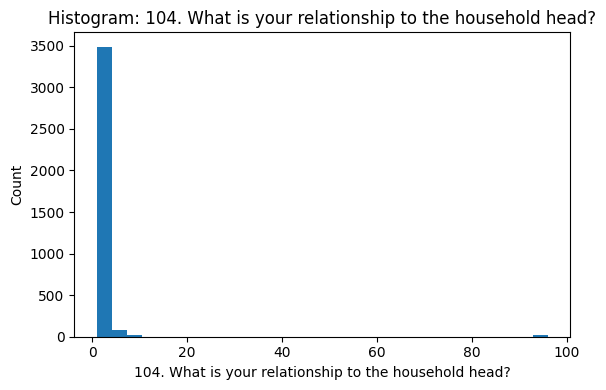

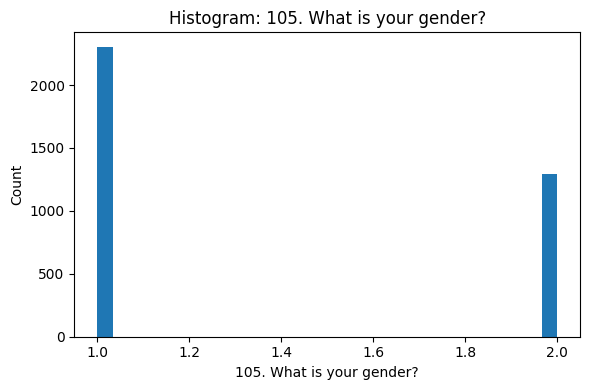

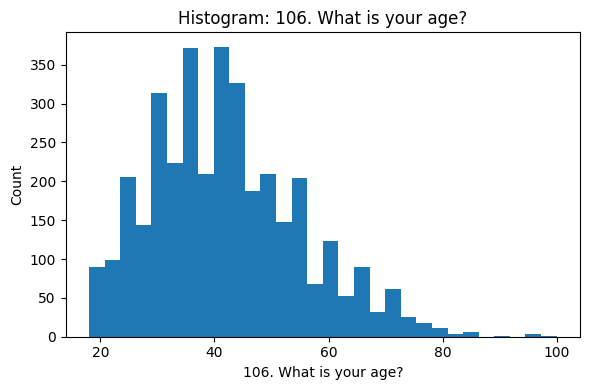

In [16]:

def plot_histograms(frame, columns, bins=30, logscale_candidates=None):
    for col in columns:
        data = frame[col].dropna()
        if data.empty:
            continue
        plt.figure(figsize=(6,4))
        plt.hist(data, bins=bins)
        plt.title(f"Histogram: {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

plot_histograms(df_renamed, numeric_cols[1:5], bins=30)


You see that most of numerical columns are actually boleans or not relevant as histograms, we use smarter approach to visualize our columns:

In [17]:
def is_boolish(s: pd.Series):
    # True booleans or 0/1 only (ignoring NaN)
    if s.dtype == bool:
        return True
    if np.issubdtype(s.dtype, np.number):
        uniq = pd.unique(s.dropna())
        return set(uniq).issubset({0, 1})
    # string-y 'yes/no/true/false/1/0'
    if s.dtype == object:
        vals = s.dropna().astype(str).str.lower().unique()
        return set(vals).issubset({"0","1","true","false","yes","no"})
    return False

def is_continuous_numeric(s: pd.Series, small_card_max=12):
    if not np.issubdtype(s.dropna().dtype, np.number):
        return False
    nunq = s.nunique(dropna=True)
    # treat as continuous if reasonably many distinct values
    return nunq > small_card_max

def weighted_counts(series, weights=None):
    if weights is None:
        vc = series.value_counts(dropna=False)
        return (vc / vc.sum() * 100).sort_values(ascending=False)  # percent
    dfw = pd.DataFrame({"val": series})
    dfw["_w"] = weights
    out = dfw.groupby("val", dropna=False)["_w"].sum()
    return (out / out.sum() * 100).sort_values(ascending=False)

def smart_univariate_plot(df, col, weight_col=None, bins=30, top=12, likert_order=None):
    s = df[col]
    w = df[weight_col] if weight_col and weight_col in df.columns else None

    # 1) Boolean / multi-select dummy
    if is_boolish(s):
        # Normalize different encodings to True/False
        if s.dtype != bool:
            s = s.astype(str).str.lower().isin(["1","true","yes"])
        pct = weighted_counts(s.fillna(False), weights=w)
        plt.figure(figsize=(5,3.5))
        plt.bar(pct.index.astype(str), pct.values)
        plt.ylabel("% of records")
        plt.title(f"{col} (boolean)")
        plt.tight_layout()
        plt.show()
        return

    # 2) Continuous numeric
    if is_continuous_numeric(s):
        data = s.dropna().values
        if data.size == 0: 
            return
        plt.figure(figsize=(6,4))
        plt.hist(data, bins=bins)
        plt.title(f"Histogram: {col}")
        plt.xlabel(col); plt.ylabel("Count"); plt.tight_layout(); plt.show()

        # optional log view if highly skewed (skewness > 1)
        skew = pd.Series(data).skew()
        if np.isfinite(skew) and skew > 1 and (data > 0).mean() > 0.95:
            plt.figure(figsize=(6,4))
            plt.hist(np.log1p(data[data>0]), bins=bins)
            plt.title(f"Histogram (log1p): {col}")
            plt.xlabel(f"log1p({col})"); plt.ylabel("Count"); plt.tight_layout(); plt.show()
        return

    # 3) Small-cardinality numeric (coded categories) OR text/object
    if likert_order is not None and set(pd.unique(s.dropna())) <= set(likert_order):
        # ordered bars for Likert (e.g., [1,2,3,4,5])
        ordered = pd.Categorical(s, categories=likert_order, ordered=True)
        pct = weighted_counts(ordered, weights=w)
    else:
        pct = weighted_counts(s.astype("object"), weights=w)

    pct = pct.head(top)
    plt.figure(figsize=(7,4))
    plt.bar([str(i) for i in pct.index], pct.values)
    plt.xticks(rotation=35, ha="right")
    plt.ylabel("% of records")
    plt.title(f"{col} (top {top})")
    plt.tight_layout()
    plt.show()

def plot_eda_overview(df, cols=None, weight_col=None, bins=30, top=12):
    """Plot a sensible chart per column; if cols=None, sample a few from each type."""
    if cols is None:
        # Heuristics to pick a manageable subset automatically
        boolish = [c for c in df.columns if is_boolish(df[c])]
        continuous = [c for c in df.columns if is_continuous_numeric(df[c])]
        smallcat = [c for c in df.columns 
                    if (not is_boolish(df[c])) and (not is_continuous_numeric(df[c]))]

        cols = []
        cols += boolish[:6]
        cols += continuous[:6]
        cols += smallcat[:8]

    for c in cols:
        try:
            smart_univariate_plot(df, c, weight_col=weight_col, bins=bins, top=top)
        except Exception as e:
            print(f"[skip] {c}: {e}")


### Now plot using the above defined functions

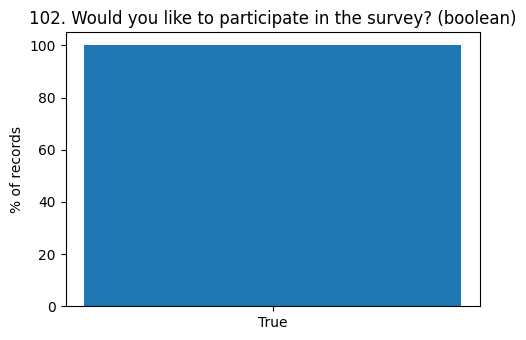

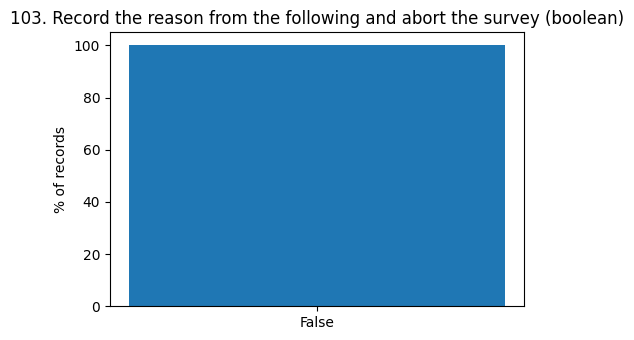

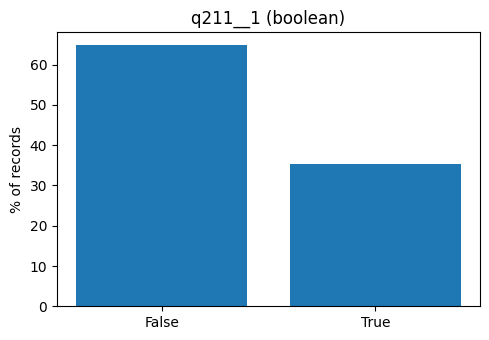

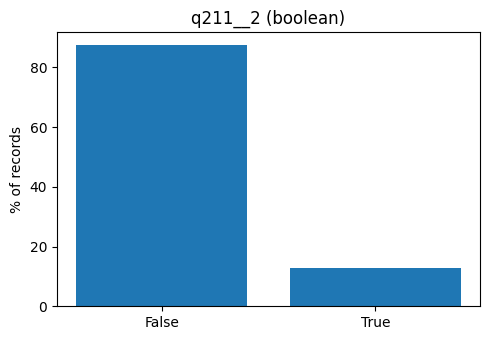

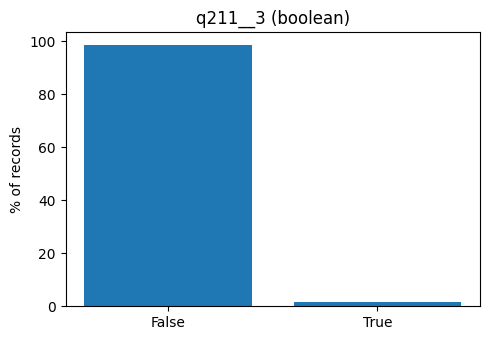

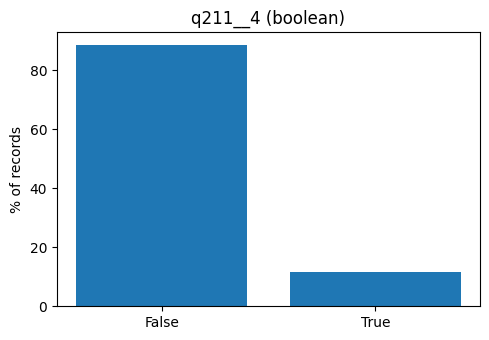

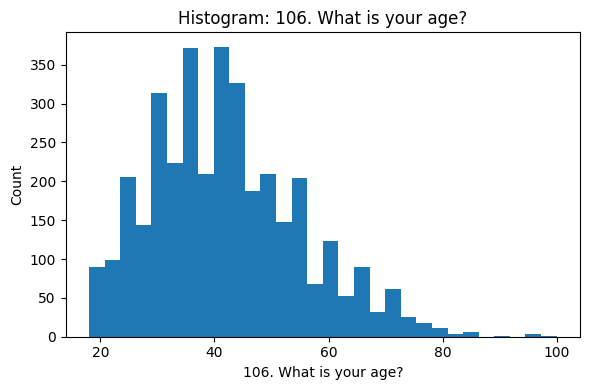

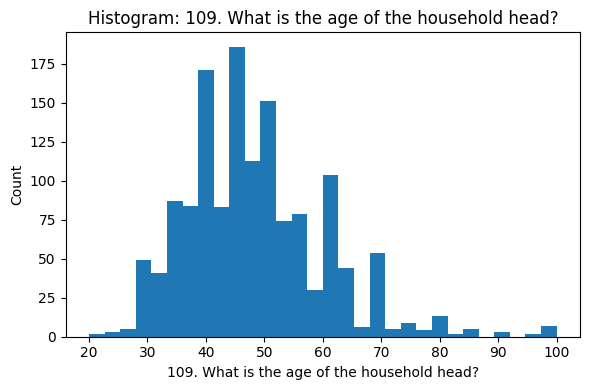

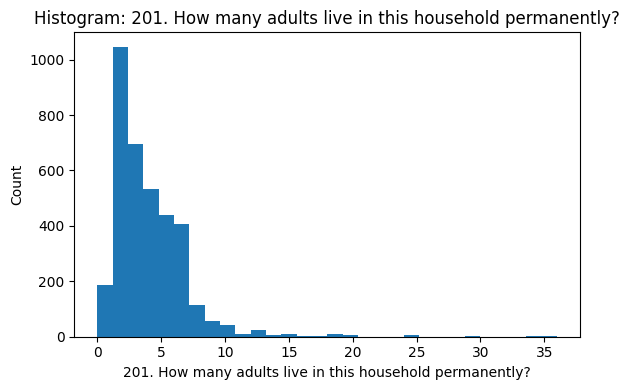

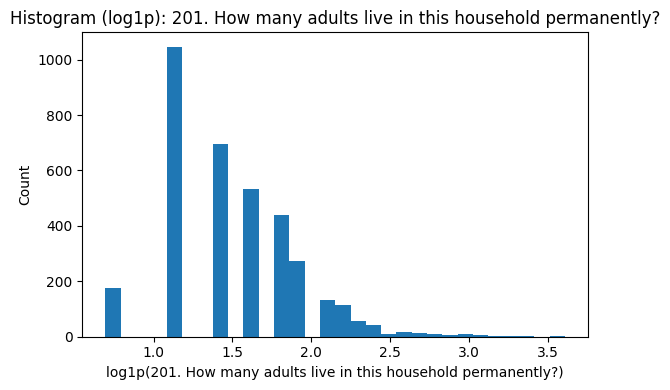

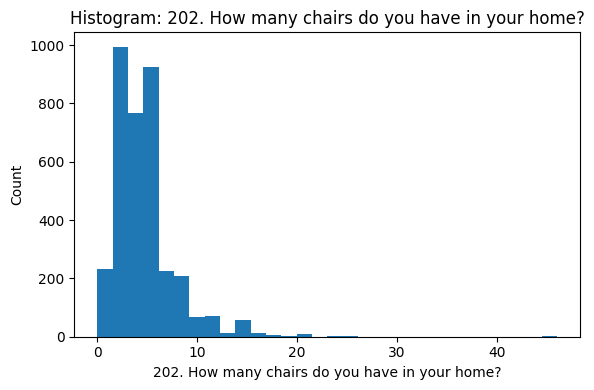

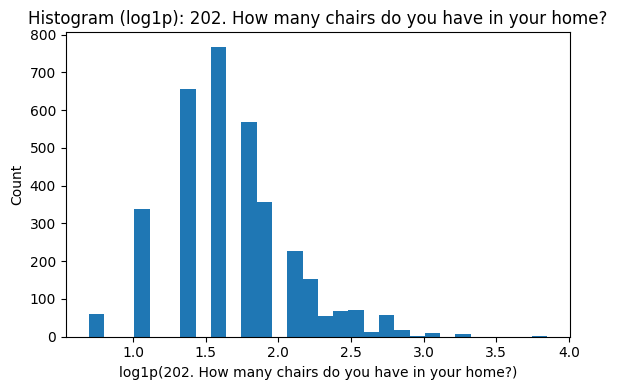

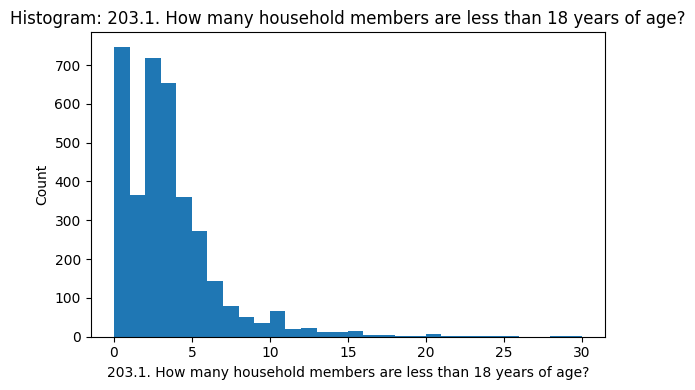

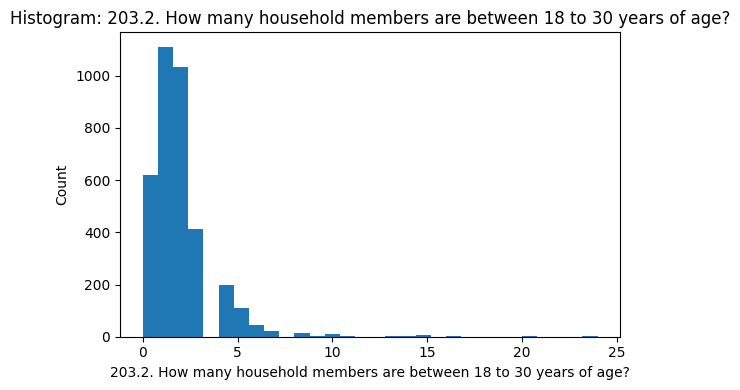

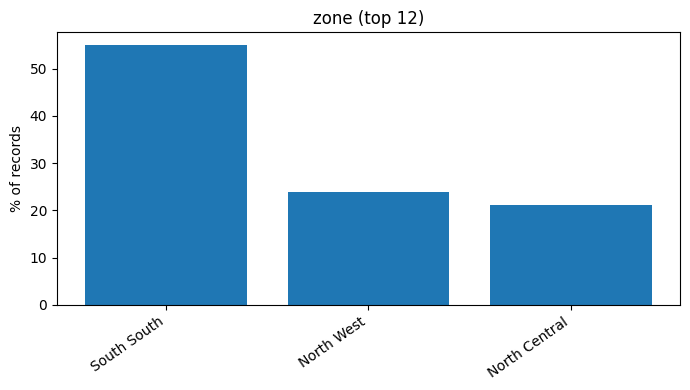

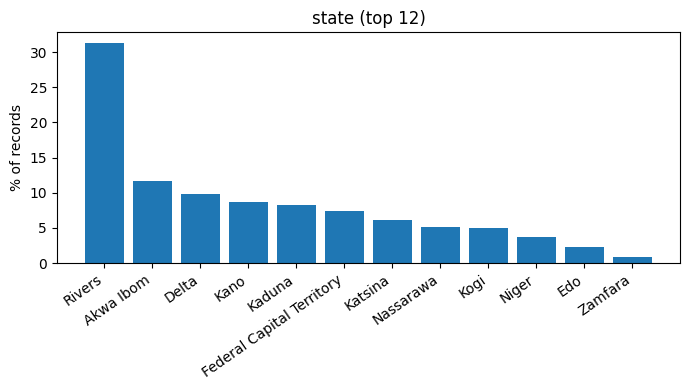

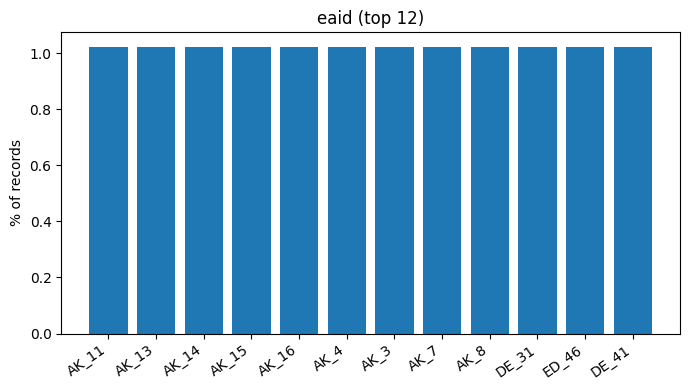

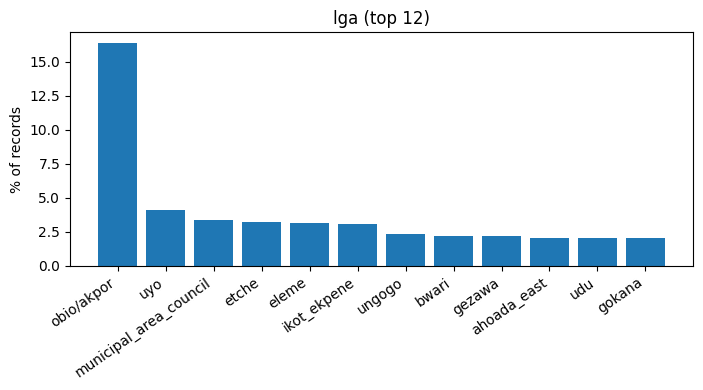

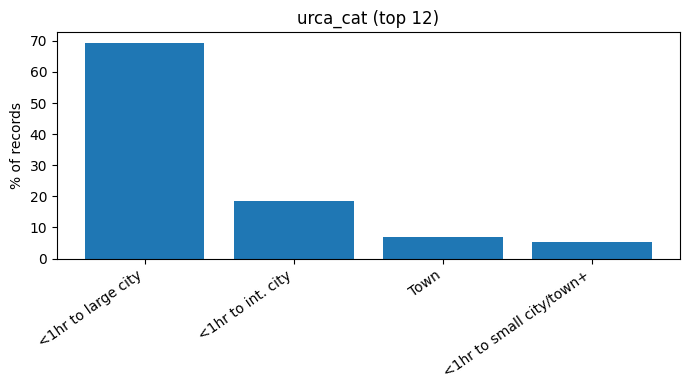

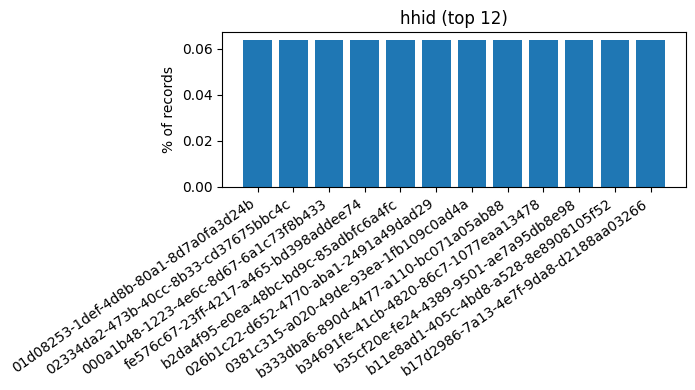

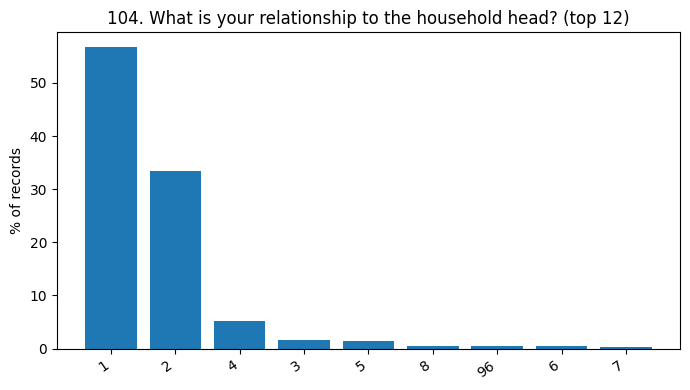

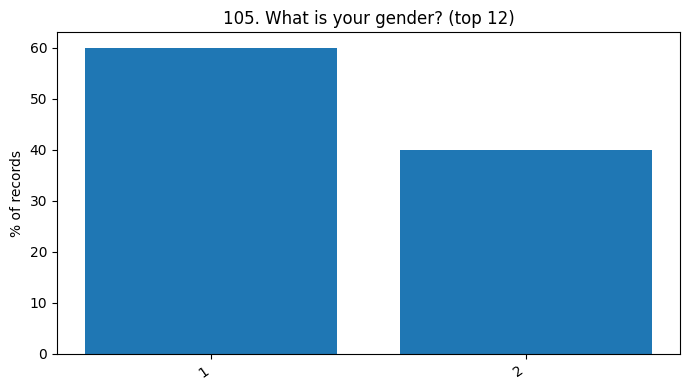

In [18]:
plot_eda_overview(df_renamed, weight_col="natweight", bins=30, top=12)

### Or explicitly pick columns you care about:


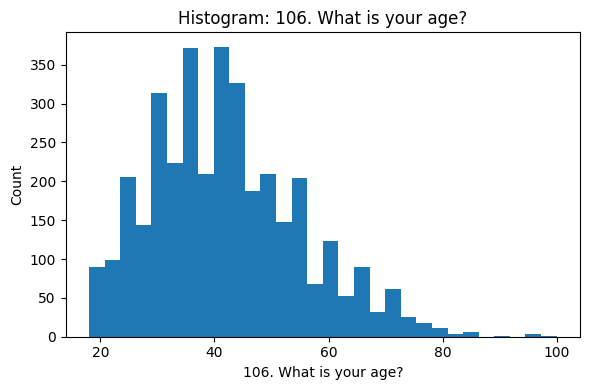

In [19]:
cols = [
    "106. What is your age?",
]
plot_eda_overview(df_renamed, cols=cols, weight_col="natweight")



## 8) Numeric vs Categorical
- Compare distributions of a numeric variable **across categories** (group summaries).


In [20]:

def grouped_summary(frame, num_col, cat_col):
    g = frame[[num_col, cat_col]].dropna().groupby(cat_col)[num_col]
    summary = pd.DataFrame({
        "count": g.count(),
        "mean": g.mean(),
        "median": g.median(),
        "std": g.std()
    }).sort_values("mean", ascending=False)
    return summary

# Print grouped summaries for the first few combinations
for cat in categorical_cols[:2]:
    for num in numeric_cols[:3]:
        print(f"\n--- {num} by {cat} ---")
        display(grouped_summary(df_renamed, num, cat).head(10))



--- 102. Would you like to participate in the survey? by zone ---


,count,mean,median,std
zone,,,,
North Central,1200,1.0,1.0,0.0
North West,1200,1.0,1.0,0.0
South South,1199,1.0,1.0,0.0



--- 103. Record the reason from the following and abort the survey by zone ---


,count,mean,median,std
zone,,,,



--- 104. What is your relationship to the household head? by zone ---


,count,mean,median,std
zone,,,,
North Central,1200,2.691667,1.0,10.198690
South South,1199,2.035029,2.0,4.847467
North West,1200,1.569167,1.0,3.951147



--- 102. Would you like to participate in the survey? by state ---


,count,mean,median,std
state,,,,
Akwa Ibom,223,1.0,1.0,0.0
Delta,400,1.0,1.0,0.0
Edo,48,1.0,1.0,0.0
Federal Capital Territory,368,1.0,1.0,0.0
Kaduna,400,1.0,1.0,0.0
Kano,400,1.0,1.0,0.0
Katsina,352,1.0,1.0,0.0
Kogi,288,1.0,1.0,0.0
Nassarawa,272,1.0,1.0,0.0



--- 103. Record the reason from the following and abort the survey by state ---


,count,mean,median,std
state,,,,



--- 104. What is your relationship to the household head? by state ---


,count,mean,median,std
state,,,,
Federal Capital Territory,368,3.527174,1.0,12.942519
Niger,272,3.205882,1.0,12.757238
Rivers,528,2.357955,2.0,7.173024
Kogi,288,2.138889,1.0,5.717643
Kano,400,1.952500,1.0,6.741949
Delta,400,1.947500,2.0,1.250461
Nassarawa,272,1.632353,1.0,5.771554
Akwa Ibom,223,1.605381,1.0,1.105420
Kaduna,400,1.547500,1.0,0.956573



## 9) Correlation Matrix (for continious numeric Only)
- Use with care: correlation ≠ causation.
- Still, helpful for spotting redundant features or strong linear relationships.


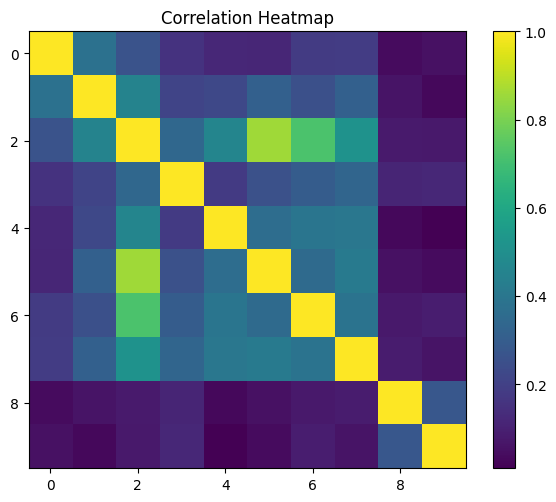

,106. What is your age?,109. What is the age of the household head?,201. How many adults live in this household permanently?,202. How many chairs do you have in your home?,203.1. How many household members are less than 18 years of age?,203.2. How many household members are between 18 to 30 years of age?,203.3. How many household members are between 31 to 55 years of age?,205. How many separate rooms are in all buildings of your home plot/compound?,208. What is the highest level of education achieved by a male currently living in this household?,209. What is the highest level of education achieved by a female currently living in this household?
106. What is your age?,1.000,0.377,0.264,0.154,0.122,0.116,0.181,0.187,0.038,0.055
109. What is the age of the household head?,0.377,1.000,0.451,0.214,0.226,0.313,0.250,0.312,0.061,0.033
201. How many adults live in this household permanently?,0.264,0.451,1.000,0.341,0.461,0.857,0.721,0.513,0.080,0.078
202. How many chairs do you have in your home?,0.154,0.214,0.341,1.000,0.178,0.256,0.297,0.333,0.110,0.121
203.1. How many household members are less than 18 years of age?,0.122,0.226,0.461,0.178,1.000,0.365,0.395,0.403,0.029,0.009
203.2. How many household members are between 18 to 30 years of age?,0.116,0.313,0.857,0.256,0.365,1.000,0.351,0.418,0.054,0.040
203.3. How many household members are between 31 to 55 years of age?,0.181,0.250,0.721,0.297,0.395,0.351,1.000,0.388,0.078,0.090
205. How many separate rooms are in all buildings of your home plot/compound?,0.187,0.312,0.513,0.333,0.403,0.418,0.388,1.000,0.085,0.063
208. What is the highest level of education achieved by a male currently living in this household?,0.038,0.061,0.080,0.110,0.029,0.054,0.078,0.085,1.000,0.279
209. What is the highest level of education achieved by a female currently living in this household?,0.055,0.033,0.078,0.121,0.009,0.040,0.090,0.063,0.279,1.000


In [21]:
# Filter only continuous numeric columns from your existing numeric_cols list
cont_cols = [c for c in numeric_cols if is_continuous_numeric(df_renamed[c])]
cont_cols = cont_cols[:10]  # keep the first 5 for visualization

if len(cont_cols) >= 2:
    corr = df_renamed[cont_cols].corr(numeric_only=True)
    plt.figure(figsize=(6,5))
    plt.imshow(corr, interpolation="nearest")
    plt.title("Correlation Heatmap")
    plt.colorbar()
    # Optional labels:
    # ticks = range(len(corr.columns))
    # plt.xticks(ticks, corr.columns, rotation=90)
    # plt.yticks(ticks, corr.columns)
    plt.tight_layout()
    plt.show()
    display(corr.round(3))
else:
    print("Not enough continuous numeric columns to correlate.")

You could also experiment with seaborn sns.pairplot() to see nice visualisations that match two columns.

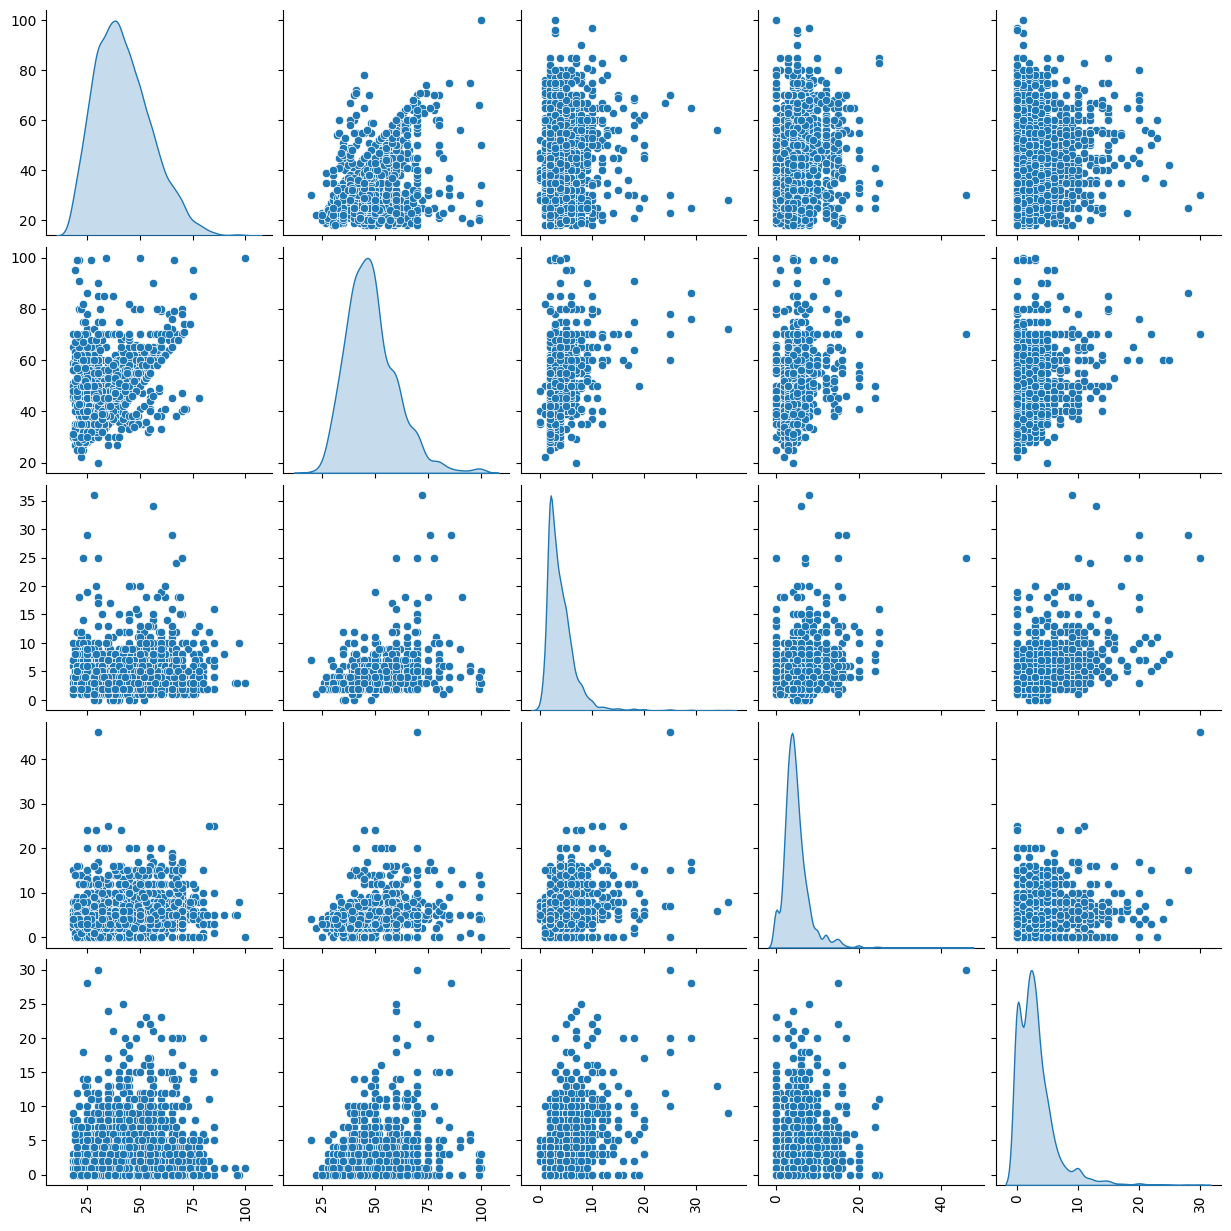

In [22]:
import seaborn as sns
cont_cols = [c for c in numeric_cols if is_continuous_numeric(df_renamed[c])]

# Create the pair plot
g = sns.pairplot(df_renamed[cont_cols[:5]], diag_kind="kde")

for ax in g.axes.flatten():
    # ticks
    ax.tick_params(axis="x", labelrotation=90)
    ax.tick_params(axis="y", labelrotation=0)

    # axis titles (labels)
    ax.set_xlabel("")
    #ax.set_ylabel(ax.get_ylabel(), rotation=45,  ha="right", va="center", labelpad=10)
    ax.set_ylabel("")

g.tight_layout()
plt.show()



## 10) Time Trends
- If you had a datetime column which we don't in the PeopleSuN data: Aggregate by day/week/month and plot trends.


In [23]:

def plot_time_series(frame, date_col, value_col, freq="M"):
    sub = frame[[date_col, value_col]].dropna().copy()
    if sub.empty:
        print(f"No data to plot for {value_col}.")
        return
    sub = sub.set_index(date_col).sort_index().resample(freq).mean()
    plt.figure(figsize=(7,4))
    plt.plot(sub.index, sub[value_col])
    plt.title(f"Time Trend ({value_col}, resampled {freq})")
    plt.xlabel("Date")
    plt.ylabel(value_col)
    plt.tight_layout()
    plt.show()

if datetime_cols and numeric_cols:
    date_col = datetime_cols[0]
    for v in numeric_cols[:3]:
        plot_time_series(df_renamed, date_col, v, freq="M")



## 11) Geographic Hints
If you have **region/country** columns, consider:  
- Choropleth (later in Streamlit), or  
- Per‑region summary tables now.


In [24]:
# 1) keep only continuous numeric columns (not coded ints / dummies)
cont_cols = [c for c in numeric_cols if is_continuous_numeric(df_renamed[c])]
geo_like = [c for c in df_renamed.columns if any(k in c.lower() for k in ["zone","lga","eaid"])]
for geo in geo_like:
    for num in cont_cols[:2]:
        print(f"\nAverage {num} by {geo}:")
        display(df_renamed.groupby(geo, dropna=False)[num].mean().sort_values(ascending=True).to_frame().head(5))



Average 106. What is your age? by zone:


,106. What is your age?
zone,
North Central,41.29500
South South,42.06839
North West,42.74000



Average 109. What is the age of the household head? by zone:


,109. What is the age of the household head?
zone,
South South,46.613707
North West,49.113095
North Central,50.082192



Average 106. What is your age? by eaid:


,106. What is your age?
eaid,
KD_92,26.2500
RI_234,28.5625
KD_97,30.6250
RI_233,31.1250
FC_66,32.5000



Average 109. What is the age of the household head? by eaid:


,109. What is the age of the household head?
eaid,
KO_159,30.000000
RI_234,34.666667
KT_130,35.000000
FC_65,36.000000
NI_190,36.000000



Average 106. What is your age? by lga:


,106. What is your age?
lga,
makoda,33.50000
sabon_gari,33.93750
tai,34.93750
giwa,35.78125
kubau,36.21875



Average 109. What is the age of the household head? by lga:


,109. What is the age of the household head?
lga,
borgu,36.000000
sapele,38.466667
doma,38.666667
bindawa,39.000000
kajuru,40.000000



## 12) Write Down 2–3 Insights (Markdown)
Use this cell to note **what surprised you**, **potential data issues**, and **early hypotheses**.

- Insight 1: …  
- Insight 2: …  
- Hypothesis / Next question: …  



## 13) KPI Drafts (Driven by EDA)
Fill in a first draft of KPIs **based on variables that are present and meaningful** in your dataset.

| KPI Name | Definition | Formula (words) | Python Expression (sketch) |
|---|---|---|---|
| Example: Electrification Rate | % of electrified households | electrified / total_households | `df['electrified'] / df['total_households']` |
|  |  |  |  |
|  |  |  |  |

> Keep KPIs **simple and measurable**. We’ll refine them after cleaning/feature engineering.



## 14) What We'll Tackle Next (Feature Engineering Preview)
- Data type fixes (categorical, datetime)  
- Missing value strategies (when to impute vs. drop)  
- Outlier detection & robust statistics  
- Scaling/encoding and derived features for your KPIs  